# 2. Data Cleaning, Feature Engineering and EDA Part I

### Initial Cleaning and Feature Exploration

In [1]:
#we will clean up the dataframe and pick those column features that matter most for our model.
#usual imports for cleaning:


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#reading our combined csv
df = pd.read_csv('../data/combined.csv')

In [3]:
df.head()

,Unnamed: 0,approved_at_utc,subreddit,selftext,author_fullname,saved,mod_reason_title,gilded,clicked,title,...,subreddit_subscribers,created_utc,num_crossposts,media,is_video,post_hint,preview,crosspost_parent_list,crosspost_parent,author_cakeday
0,0,NaN,datascience,There have been quite a few changes in the sub...,t2_6kl7i,False,NaN,0,False,[META] State of the Subreddit - 2020,...,239061,1.592805e+09,0,NaN,False,NaN,NaN,NaN,NaN,NaN
1,1,NaN,datascience,"Let's say during interview, you talk about you...",t2_33bizuj,False,NaN,0,False,Is it okay to discuss the results of a model a...,...,239061,1.592789e+09,0,NaN,False,NaN,NaN,NaN,NaN,NaN
2,2,NaN,datascience,"For starters, I’m a summer intern doing some d...",t2_4jo7xlko,False,NaN,0,False,Presenting Your Value,...,239061,1.592835e+09,0,NaN,False,NaN,NaN,NaN,NaN,NaN
3,3,NaN,datascience,NaN,t2_2t86pj0o,False,NaN,0,False,Do you need to be good at maths areas like cal...,...,239061,1.592812e+09,0,NaN,False,NaN,NaN,NaN,NaN,NaN
4,4,NaN,datascience,"Hi all,\n\nI'm very new to the data science co...",t2_nlcob,False,NaN,0,False,Real Estate Market Selection,...,239061,1.592783e+09,0,NaN,False,NaN,NaN,NaN,NaN,NaN


In [4]:
df.drop("Unnamed: 0", axis=1, inplace = True) #forgot to get rid of index column duplicate earlier

In [5]:
df.shape

(1310, 110)

In [6]:
#checking for duplicate rows since its my first time scraping

duplicate_rows = df[df.duplicated(['name'])] #call mask on "name" since thats unique
print(duplicate_rows)

Empty DataFrame
Columns: [approved_at_utc, subreddit, selftext, author_fullname, saved, mod_reason_title, gilded, clicked, title, link_flair_richtext, subreddit_name_prefixed, hidden, pwls, link_flair_css_class, downs, thumbnail_height, top_awarded_type, hide_score, name, quarantine, link_flair_text_color, upvote_ratio, author_flair_background_color, subreddit_type, ups, total_awards_received, media_embed, thumbnail_width, author_flair_template_id, is_original_content, user_reports, secure_media, is_reddit_media_domain, is_meta, category, secure_media_embed, link_flair_text, can_mod_post, score, approved_by, author_premium, thumbnail, edited, author_flair_css_class, author_flair_richtext, gildings, content_categories, is_self, mod_note, created, link_flair_type, wls, removed_by_category, banned_by, author_flair_type, domain, allow_live_comments, selftext_html, likes, suggested_sort, banned_at_utc, view_count, archived, no_follow, is_crosspostable, pinned, over_18, all_awardings, awarde

In [7]:
#no duplicates, the unique post scraper worked properly. 

df.head() #obviously we have a huge dataframe here of 1310 rows x 110 columns. 

#it will be wise to pick key features to prevent overfitting of our models later.

,approved_at_utc,subreddit,selftext,author_fullname,saved,mod_reason_title,gilded,clicked,title,link_flair_richtext,...,subreddit_subscribers,created_utc,num_crossposts,media,is_video,post_hint,preview,crosspost_parent_list,crosspost_parent,author_cakeday
0,NaN,datascience,There have been quite a few changes in the sub...,t2_6kl7i,False,NaN,0,False,[META] State of the Subreddit - 2020,[],...,239061,1.592805e+09,0,NaN,False,NaN,NaN,NaN,NaN,NaN
1,NaN,datascience,"Let's say during interview, you talk about you...",t2_33bizuj,False,NaN,0,False,Is it okay to discuss the results of a model a...,[],...,239061,1.592789e+09,0,NaN,False,NaN,NaN,NaN,NaN,NaN
2,NaN,datascience,"For starters, I’m a summer intern doing some d...",t2_4jo7xlko,False,NaN,0,False,Presenting Your Value,[],...,239061,1.592835e+09,0,NaN,False,NaN,NaN,NaN,NaN,NaN
3,NaN,datascience,NaN,t2_2t86pj0o,False,NaN,0,False,Do you need to be good at maths areas like cal...,[],...,239061,1.592812e+09,0,NaN,False,NaN,NaN,NaN,NaN,NaN
4,NaN,datascience,"Hi all,\n\nI'm very new to the data science co...",t2_nlcob,False,NaN,0,False,Real Estate Market Selection,[],...,239061,1.592783e+09,0,NaN,False,NaN,NaN,NaN,NaN,NaN


### We need to go through each of the column names to see what looks relevant:

In [8]:
cols = df.columns.tolist() 

print(cols) #created a list of columns because pandas doesn't show everything at once for memory reasons.

print(len(cols))

#will identify most relevant columns.

['approved_at_utc', 'subreddit', 'selftext', 'author_fullname', 'saved', 'mod_reason_title', 'gilded', 'clicked', 'title', 'link_flair_richtext', 'subreddit_name_prefixed', 'hidden', 'pwls', 'link_flair_css_class', 'downs', 'thumbnail_height', 'top_awarded_type', 'hide_score', 'name', 'quarantine', 'link_flair_text_color', 'upvote_ratio', 'author_flair_background_color', 'subreddit_type', 'ups', 'total_awards_received', 'media_embed', 'thumbnail_width', 'author_flair_template_id', 'is_original_content', 'user_reports', 'secure_media', 'is_reddit_media_domain', 'is_meta', 'category', 'secure_media_embed', 'link_flair_text', 'can_mod_post', 'score', 'approved_by', 'author_premium', 'thumbnail', 'edited', 'author_flair_css_class', 'author_flair_richtext', 'gildings', 'content_categories', 'is_self', 'mod_note', 'created', 'link_flair_type', 'wls', 'removed_by_category', 'banned_by', 'author_flair_type', 'domain', 'allow_live_comments', 'selftext_html', 'likes', 'suggested_sort', 'banned_a

In [9]:
#reddit is known to use bots to post repetitive administrative content. 

#let's first see if there are any authors who keep reappearing ub reacg subreddit:

df['author'][df["subreddit"]=="datascience"].value_counts()

datascience-bot      14
[deleted]            11
___24601              8
engineheat            7
expatwithajetpack     6
                     ..
RowHowlx              1
kardanada             1
coffee-pizza          1
PythonDenverDude      1
ramblin_ap            1
Name: author, Length: 505, dtype: int64

In [10]:
df['author'][df["subreddit"]=="analytics"].value_counts()

Tender_Figs       12
AutoModerator     10
dssblogger        10
VanillaIce1992     9
[deleted]          9
                  ..
cellularcone       1
DuqueTheDuke       1
Davidram24         1
aleahey            1
origamipapier1     1
Name: author, Length: 503, dtype: int64

We will remove datasciencebot and automoderator's posts - their posts in both subreddits consist of repetitive administrative identical posts designed with little substantive content that will likely skew the relevance of our words away from good word content, e.g. https://www.reddit.com/r/analytics/comments/gum80v/monthly_career_advice_thread_june_2020/

In [11]:
#dropping both authors as mentioned:
df.drop(df.loc[df['author'] == 'datascience-bot'].index, inplace=True)

In [12]:
df.drop(df.loc[df['author'] == 'AutoModerator'].index, inplace=True)

In [22]:
df.shape

(1286, 110)

In [13]:
#we see a lot of "flair" columns. what are they? let's create a for loop to harvest them and check them out

In [14]:
flair_columns = [col for col in cols if "flair" in col]

In [15]:
df[flair_columns].head()

#most of the flairs are unhelpful

#EXCEPT for "link_flair_text"; these are great because they're categorical variables that describe what the topic of the post is about. 
#so we will use that column for EDA later.

,link_flair_richtext,link_flair_css_class,link_flair_text_color,author_flair_background_color,author_flair_template_id,link_flair_text,author_flair_css_class,author_flair_richtext,link_flair_type,author_flair_type,link_flair_template_id,author_flair_text,link_flair_background_color,author_patreon_flair,author_flair_text_color
0,[],meta,dark,NaN,NaN,Meta Post of the Year,modflair,[],text,text,481ee318-d77d-11e7-a4a3-0e8624d7129a,PhD | Senior Data Scientist | Biotech,NaN,False,dark
1,[],NaN,dark,NaN,NaN,Job Search,NaN,[],text,text,71803d7a-469d-11e9-890b-0e5d959976c8,NaN,#edeff1,False,NaN
2,[],career,dark,NaN,NaN,Career,NaN,[],text,text,a6ee6fa0-d780-11e7-b6d0-0e0bd8823a7e,NaN,NaN,False,NaN
3,[],education,dark,NaN,NaN,Education,NaN,[],text,text,99f9652a-d780-11e7-b558-0e52cdd59ace,NaN,NaN,False,NaN
4,[],projects,dark,NaN,NaN,Projects,NaN,[],text,text,937a6f50-d780-11e7-826d-0ed1beddcc82,NaN,NaN,False,NaN


In [16]:
df['link_flair_text'].value_counts() #these categories are quite handy; it will be really useful for us to frame this in our heads for EDA later.

#I pick this and not "link_flair_css_class" because the latter registers Job Search topics as NaN/null values!

Discussion               317
Question                 156
Career                    80
Education                 71
Projects                  59
Tooling                   47
Google Analytics          41
Job Search                31
Fun/Trivia                11
Data                      11
Networking                 8
Meta                       7
Adobe  Analytics           2
Meta Post of the Year      1
Name: link_flair_text, dtype: int64

In [17]:
#selecting the subreddit column is obvious; 
#we need to know which subreddit the post belongs to. let's see what the numbers look like:

df['subreddit'].value_counts()

#672 analytics posts and 614 data science posts thank to our nearly even web scraping of unique posts

analytics      672
datascience    614
Name: subreddit, dtype: int64

In [18]:
df['subreddit'].isnull().sum() #there are no null values in this column either. 

0

In [24]:
#"selftext" is also necessary because it literally shows us the text of individual posts. 
#we'll include that in our chosen features too.

#reading what the last post scraped looks like
df['selftext'][1285]

'Analytics managers out there - how does your day-to-day look like? How is the day distributed in terms of managerial stuff, meetings, project planning, analysis stuff? And usually how many analysts report to you?\nDo you contribute to projects as in write queries or build some dashboards or mostly managing stuff around?'

In [25]:
#relatedly, knowing what the titles of our posts are is naturally related to intepreting the text

#so we will also keep the "title" feature
df['title'][1285]

'Analytics manager day-to-day'

In [26]:
df['url'][1285]

#we should also keep the URL for future reference in case we want to actually visit these posts in a browser.

'https://www.reddit.com/r/analytics/comments/eozmqs/analytics_manager_daytoday/'

In [27]:
df['score'][1285]

#the net upvote/downvote score is also important, because it's the equivalent of net "likes". 
#although the number is not a "real" number, it's still a reasonably good indication of a post's popularity, 
#so we'll keep it.

#source: https://www.reddit.com/wiki/faq#wiki_how_is_a_submission.27s_score_determined.3F

9

In [28]:
df['num_comments'][1285]

#"num_comments"  refers to the number of comments posted in that post. 
#It is a good indicator of interest in the post because it means lots of people are discussing it. 

#we will keep this feature for future EDA.

9

Let's see what our initial chosen features are in a sample of the dataframe:

In [29]:
df[["title","link_flair_text","selftext","score","url", "num_comments", "subreddit"]].head()

,title,link_flair_text,selftext,score,url,num_comments,subreddit
0,[META] State of the Subreddit - 2020,Meta Post of the Year,There have been quite a few changes in the sub...,5,https://www.reddit.com/r/datascience/comments/...,4,datascience
1,Is it okay to discuss the results of a model a...,Job Search,"Let's say during interview, you talk about you...",119,https://www.reddit.com/r/datascience/comments/...,24,datascience
2,Presenting Your Value,Career,"For starters, I’m a summer intern doing some d...",10,https://www.reddit.com/r/datascience/comments/...,4,datascience
3,Do you need to be good at maths areas like cal...,Education,NaN,19,https://www.reddit.com/r/datascience/comments/...,40,datascience
4,Real Estate Market Selection,Projects,"Hi all,\n\nI'm very new to the data science co...",69,https://www.reddit.com/r/datascience/comments/...,17,datascience


In [30]:
#we will create another dataframe to further clean based on this.

In [31]:
df_raw = df[["title","link_flair_text","selftext","score","url", "num_comments", "subreddit"]]

### Why we initally use these 7 features out of the 110 columns scraped

Recalling that our problem statement is to use our particular models to:

* accurately predict whether a post is from r/DataScience or r/Analytics, and 
* use the better performing model to distinguish what conceptual and technical differences exist between Data Science vs Analytics through keyword analysis of the two subreddits

**The other columns are simply not relevant to this aim.** This is because the other columns broadly relate to these website functions:

1. stylistic features e.g. `link_flair_text_color`, 
2. reddit awards i.e. graphical super-likes e.g. `all_awardings`,
3. media formatting e.g. `is_reddit_media_domain`, `thumbnail_width`
4. mod actions e.g. `parent_whitelist_status`, `mod_reports`.

The only other column I would've wanted to put in is `num_crossposts`, because this shows particular data science or analytics posts that were interesting enough to have been posted elsewhere around reddit. However, we see below that 94% of the values are 0, which means we don't have much to go on for predictive or conceptual analysis, as can be seen here:

In [32]:
df["num_crossposts"].value_counts(normalize=True) * 100

0    94.634526
1     4.354588
2     0.699844
3     0.233281
5     0.077760
Name: num_crossposts, dtype: float64

Hence, we stick to our 6 columns at least for now before we get into feature pre-processing. For now we will carry on the cleaning.

In [33]:
df_raw.columns

#our 7 columns again.

Index(['title', 'link_flair_text', 'selftext', 'score', 'url', 'num_comments',
       'subreddit'],
      dtype='object')

In [34]:
df_raw.shape

#we have a more sensible size of columns dataframe to focus on,  
#and we still have plenty of rows available from the data generated during scraping.

(1286, 7)

### Null Value Fixing

We can quickly use a heatmap to see how bad the null values are (in yellow lines) within our targeted dataframe.

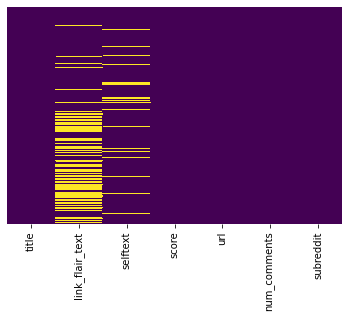

In [35]:
sns.heatmap(df_raw.isnull(),yticklabels=False,cbar=False,cmap='viridis');

In [36]:
#we immediately can visualize a substantial number of the values in "link_flair_text" are NaNs, 
#and a handful in the post text itself. 

#Let's see just how bad the nulls are for "link_flair_text":

df_raw["link_flair_text"].isnull().value_counts(normalize=True)*100

False    65.474339
True     34.525661
Name: link_flair_text, dtype: float64

In [37]:
#so about a third of all our link_flair_text values are null categories. 

#Let's explore what they are side by side with our other features to see if we can discern a trend.
#we can do this by sorting the values by NaNs using a temporary formatting column that is also dropped immediately

df_raw['null_count'] = df_raw.isnull().sum(axis=1) 
df_null_assess = df_raw.sort_values('null_count', ascending=False).drop('null_count', axis=1).head(10) #i do this by sorting by 

df_null_assess

#there isn't any particular pattern in the null values for "link_flair_text" visible from the first 10 header rows. 

/Users/grahamlim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,title,link_flair_text,selftext,score,url,num_comments,subreddit
624,Crowd-sourced COVID-19 Dataset Tracking Involu...,NaN,NaN,5,https://github.com/rexdouglass/TIGR,1,datascience
759,What could be the potential uses of a detailed...,NaN,NaN,1,/r/chemistry/comments/gsneal/what_could_be_the...,0,analytics
1130,Do any of you know how the tuition budget for ...,NaN,NaN,1,https://www.reddit.com/r/analytics/comments/f7...,2,analytics
1037,What is the best way to learn Google Analytics...,NaN,NaN,0,https://www.reddit.com/r/analytics/comments/fk...,7,analytics
1283,A few months ago I posted about my subreddit r...,NaN,NaN,27,/r/RedditRecommender/comments/eon3ry/analytics/,1,analytics
728,Any Analysts here working in Supply Chain?,NaN,NaN,2,https://www.reddit.com/r/analytics/comments/gw...,5,analytics
800,Pytrends - Is there a way to use Pytrends or a...,NaN,NaN,11,https://www.reddit.com/r/analytics/comments/gm...,2,analytics
1277,[Help] Google Data Studio Missing Metrics,NaN,NaN,1,/r/adwords/comments/eq5wxj/help_google_data_st...,0,analytics
1147,RFM Analysis,NaN,NaN,1,/r/datascience/comments/f5swbm/rfm_analysis_wi...,0,analytics
1027,5 year of exp in analytics / reporting/ etl de...,NaN,NaN,11,https://www.reddit.com/r/analytics/comments/fo...,9,analytics


In [39]:
#I'll look through each URL in the browser and see if there's anything common in the flair NaNs I'm not detecting from the dataframe

df_null_assess[["link_flair_text","title","url","subreddit"]]

,link_flair_text,title,url,subreddit
624,NaN,Crowd-sourced COVID-19 Dataset Tracking Involuntary Government Restrictions (TIGR) Need Help!,https://github.com/rexdouglass/TIGR,datascience
759,NaN,What could be the potential uses of a detailed water quality database?,/r/chemistry/comments/gsneal/what_could_be_the_potential_uses_of_a_detailed/,analytics
1130,NaN,Do any of you know how the tuition budget for Pepperdine University is spent?,https://www.reddit.com/r/analytics/comments/f73zrb/do_any_of_you_know_how_the_tuition_budget_for/,analytics
1037,NaN,What is the best way to learn Google Analytics and be an Analytics Hotshot?,https://www.reddit.com/r/analytics/comments/fknuvb/what_is_the_best_way_to_learn_google_analytics/,analytics
1283,NaN,A few months ago I posted about my subreddit recommendation algorithm. Now I've made it into a reddit bot anyone can use. Come over to r/RedditRecommender to get personal or subreddit based recommendations! Here is what it recommends for r/analytics:,/r/RedditRecommender/comments/eon3ry/analytics/,analytics
728,NaN,Any Analysts here working in Supply Chain?,https://www.reddit.com/r/analytics/comments/gworz4/any_analysts_here_working_in_supply_chain/,analytics
800,NaN,Pytrends - Is there a way to use Pytrends or any other Python module to get Google Trends data by the minute?,https://www.reddit.com/r/analytics/comments/gm2f3b/pytrends_is_there_a_way_to_use_pytrends_or_any/,analytics
1277,NaN,[Help] Google Data Studio Missing Metrics,/r/adwords/comments/eq5wxj/help_google_data_studio_missing_metrics/,analytics
1147,NaN,RFM Analysis,/r/datascience/comments/f5swbm/rfm_analysis_with_heavily_skewed_input_variable/,analytics
1027,NaN,5 year of exp in analytics / reporting/ etl dev for supply chain / finance / software. Anyone here exit analytics / parlay the skills. If so what and any advice ?,https://www.reddit.com/r/analytics/comments/fo8b34/5_year_of_exp_in_analytics_reporting_etl_dev_for/,analytics


### Data Imputation 
After going through each of these URLs myself, I find no discernible specific topic in the null values for `link_flair_text`. However, we see that the most frequent category in that flair column is the generic "Discussion" category in our code below:

"Discussion" appears to be a catch-all category that we can logically impute over the generally free-ranging topics of the null-values, as per below:


In [41]:
df_raw["link_flair_text"].value_counts(normalize=True) * 100 #37.6% of all post categories are general discussions

Discussion               37.648456
Question                 18.527316
Career                   9.501188 
Education                8.432304 
Projects                 7.007126 
Tooling                  5.581948 
Google Analytics         4.869359 
Job Search               3.681710 
Fun/Trivia               1.306413 
Data                     1.306413 
Networking               0.950119 
Meta                     0.831354 
Adobe  Analytics         0.237530 
Meta Post of the Year    0.118765 
Name: link_flair_text, dtype: float64

In [42]:
#so let's go and actually impute "Discussion" over null values. 
#I keep getting a warning message if I impute over sliced dataframes so I will fill it up in the master df

df_raw["link_flair_text"].fillna('Discussion',inplace=True)

/Users/grahamlim/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [43]:
#double checking that our link_flair_text column has no more nulls, and it worked despite the warning
#we are left with selftext now.

df_raw.isna().sum()

title              0  
link_flair_text    0  
selftext           100
score              0  
url                0  
num_comments       0  
subreddit          0  
null_count         0  
dtype: int64

In [44]:
#examining text-less posts against their titles to see if we can impute anything consistent:
#we recycle our previous null counting sorter code from earlier
df_raw['null_count'] = df_raw.isnull().sum(axis=1) 
df_null_assess = df_raw.sort_values('null_count', ascending=False).drop('null_count', axis=1).head(10) 

df_null_assess

/Users/grahamlim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,title,link_flair_text,selftext,score,url,num_comments,subreddit
968,Any data is better than no data. AGREE or DISAGREE?,Discussion,NaN,0,https://www.reddit.com/r/analytics/comments/fypdie/any_data_is_better_than_no_data_agree_or_disagree/,10,analytics
587,"I participated in my First ever ""Data Science competition"" in Analytics Vidhya. There are around 10353 registered candidates. I tried my best and got 1028 Rank Overall with 0.4791 F1 score. The person who is in Number 1 position his F1 score is 0.535.",Education,NaN,0,https://i.redd.it/oe2eshxdtgo41.jpg,0,datascience
790,Free graphing software similar to SigmaPlot?,Question,NaN,1,https://www.reddit.com/r/analytics/comments/gni2et/free_graphing_software_similar_to_sigmaplot/,0,analytics
583,"Is blockchain useful for data engineering, big data and data science?",Discussion,NaN,0,/r/dataengineering/comments/fnrs5p/is_blockchain_useful_for_data_engineering_big/,2,datascience
1059,Is it possible to perform text analytics using PowerBI? If so what add on’s / plugins I need to install to support it ?,Question,NaN,1,https://www.reddit.com/r/analytics/comments/fg8iob/is_it_possible_to_perform_text_analytics_using/,1,analytics
269,Request: One day a week when all career questions are banned,Meta,NaN,127,https://www.reddit.com/r/datascience/comments/gk4alt/request_one_day_a_week_when_all_career_questions/,40,datascience
1189,Best visualization export format and/or a viz builder with detailed formatting controls?,Discussion,NaN,1,/r/BusinessIntelligence/comments/ezwo5f/best_visualization_export_format_andor_a_viz/,3,analytics
800,Pytrends - Is there a way to use Pytrends or any other Python module to get Google Trends data by the minute?,Discussion,NaN,11,https://www.reddit.com/r/analytics/comments/gm2f3b/pytrends_is_there_a_way_to_use_pytrends_or_any/,2,analytics
572,Call to Action to the Tech Community on New Machine Readable COVID-19 Dataset | The White House,Discussion,NaN,4,https://www.whitehouse.gov/briefings-statements/call-action-tech-community-new-machine-readable-covid-19-dataset/,2,datascience
571,Free Data Science Courses from 365 Data Science until 15 April 2020,Education,NaN,56,https://365datascience.com/pricing,6,datascience


Every single one of these posts that do not have post text have a title, and may have either an image or a simple repost of a webpages from elsewhere e.g. a news article. Sometimes, the post only has text in a title asking a question that may gets comments in reply. After going through a sampling of some of these URLs manually,
even **posts with null values in "selftext" will still have content**, and we can at least find that content in "title". 

This means we can't drop those rows as there is valuable text data in all posts. We can instead impute those rows without post text as "none".

In [45]:
#filling NaNs with "none"
#I keep getting a warning message if I impute over sliced dataframes so I will fill it up in the master df

df_raw["selftext"].fillna('none',inplace=True)

/Users/grahamlim/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [46]:
#let's check if our chosen features have any more null values left:

df_raw.isna().sum()

#nope, it worked despite the warning message.

title              0
link_flair_text    0
selftext           0
score              0
url                0
num_comments       0
subreddit          0
null_count         0
dtype: int64

In [47]:
#getting rid of our null_count temporary column

df_raw.drop('null_count', axis = 1, inplace = True)

/Users/grahamlim/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


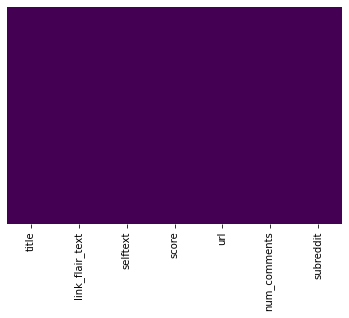

In [48]:
sns.heatmap(df_raw.isnull(),yticklabels=False,cbar=False,cmap='viridis'); #no more nulls visible either.

In [49]:
#exporting this sliced dataframe into another .csv file as backup.

df_raw.to_csv('/Users/grahamlim/Documents/DSI15/lab_projects_copy/project_3/data/df_clean.csv', index=False)


## Feature Engineering and EDA Part I

### General Feature Engineering (before Text Processing)

In [50]:
#re-read the clean csv file so as to avoid the warning message that pandas keeps giving about modifying values in dataframe slices

df_clean = pd.read_csv("../data/df_clean.csv")

In [51]:
df_clean.columns #check all columns

Index(['title', 'link_flair_text', 'selftext', 'score', 'url', 'num_comments',
       'subreddit'],
      dtype='object')

In [52]:
df_clean.shape

(1286, 7)

In [53]:
#let's remind ourselves what the datatypes are in each columns:

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1286 entries, 0 to 1285
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   title            1286 non-null   object
 1   link_flair_text  1286 non-null   object
 2   selftext         1286 non-null   object
 3   score            1286 non-null   int64 
 4   url              1286 non-null   object
 5   num_comments     1286 non-null   int64 
 6   subreddit        1286 non-null   object
dtypes: int64(2), object(5)
memory usage: 70.5+ KB


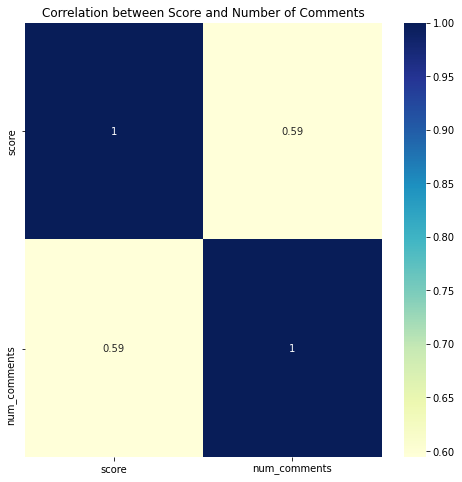

In [54]:
#is there a correlation between number of comments and post scores across subreddits? let's take a look using a heatmap:

score_comment_heatmap = df_clean[["score", "num_comments"]].corr()

plt.figure(figsize = (8,8))
sns.heatmap(score_comment_heatmap, cmap= "YlGnBu", annot= True)
plt.title("Correlation between Score and Number of Comments");

there is a moderate correlation between scores and comments; implying that upvoted posts will have more comments than those that don't.
If I want to create an interaction term that has a combined variable score, by creating a new column whereby `score*num_comments`, i must be careful of posts with 0 scores.

This is because that would cause such observations to have a combined variable score to be zero regardless of number of comments, and vice versa.

Will people still comment around posts with a 0 score? Let's see below:

In [55]:
df_no_score = df_clean[df_clean["score"]==0]

df_no_score["num_comments"].describe()

#they still will!

count    123.000000
mean     6.471545  
std      7.831552  
min      0.000000  
25%      2.000000  
50%      5.000000  
75%      8.000000  
max      48.000000 
Name: num_comments, dtype: float64

In [56]:
df_no_comments = df_clean[df_clean["num_comments"]==0]

df_no_score["score"].describe()

#but posts without comments are never upvoted even once and always have a zero score.

count    123.0
mean     0.0  
std      0.0  
min      0.0  
25%      0.0  
50%      0.0  
75%      0.0  
max      0.0  
Name: score, dtype: float64

Even with zero score posts, the mean number of comments is still about 6. That means if I tried to create an interactive term combining both variables, I'd likely end up not factoring 123 posts, which represents nearly 10% of all my data. I don't wish to unnecessarily weigh against that data and so I won't create an interactive term and leave the columns separate.

However, it may also be worthwhile to create a column of `post_word_count` of posts to see whether one subreddit has generally more written content than another - this could help us see if data science is thematically more complex than analytics. Let's create that column:

In [57]:
df_clean['post_word_count'] = df_clean['selftext'].str.findall(r'(\w+)').str.len()

#this counts the number of words obeying the regex command `\w+`, which just finds matches for any word character and counts it up.
#we then fit that new column into our dataframe

In [58]:
df_clean[['post_word_count']].head()

#this will be useful for our general EDA below:

,post_word_count
0,1067
1,64
2,356
3,1
4,396


### Numerical EDA (before Text Processing)

We will use interactive plots for our numerical data. **You'll be able to zoom in and mouse over the distributions to see value counts.**

**For the visualizations to work, please install the libraries at your command line/terminal using:**

    pip install plotly
    pip install cufflinks

In [59]:
#We will then be importing these libraries: 

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__)

#learnt this from https://towardsdatascience.com/interactive-distribution-plots-with-plotly-ea58efc78885

4.8.1


In [60]:
import cufflinks as cf

In [61]:
#we have to make sure this code is run for Jupyter Notebooks otherwise the plots may not happen:

init_notebook_mode(connected=True)

In [62]:
#we have to make sure this code is run otherwise the visualizations won't run offline:
cf.go_offline()

**Which subreddit has more posts?**

In [63]:
#we create a plotly interactive histogram of the number of posts per subreddit
df_posts=df_clean[["subreddit"]]

df_posts.iplot(kind='histogram', title='Most Popular Subreddit by Number of Posts', theme = "white")

**What's the distribution of scores for each subreddit?**

In [64]:
import plotly.express as px #another related library of plotly that makes it easy to draw multiple plots

In [65]:
px.histogram(data_frame=df_clean, x="score", color="subreddit", 
             marginal="box", title="Histogram and Boxplot Post Score Distribution, by Subreddit") 

#plots histograms and boxplots of datascience and analytics
#learnt this from https://plotly.com/python/histograms/

**What's the distribution of post length for each subreddit?**

In [66]:
px.histogram(data_frame=df_clean, x="post_word_count", color="subreddit", 
             marginal="box", title="Histogram and Boxplot Post Word Count Distribution, by Subreddit") 

In [67]:
px.histogram(data_frame=df_clean, x="num_comments", color="subreddit", 
             marginal="box", title="Histogram/Boxplot Distribution of Number of Comments, by Subreddit") 

### Exploratory Analysis of Statistics- Which profession talks more about their craft, Data Analysts or Data Scientists?

In [68]:
df_clean.groupby(["subreddit"])[["post_word_count","num_comments"]].describe().T

subreddit                analytics  datascience
post_word_count count  672.000000   614.000000 
                mean   118.693452   142.345277 
                std    182.548611   198.685906 
                min    1.000000     1.000000   
                25%    46.000000    45.000000  
                50%    84.000000    90.500000  
                75%    139.000000   163.000000 
                max    3068.000000  2164.000000
num_comments    count  672.000000   614.000000 
                mean   7.790179     27.247557  
                std    9.080811     43.667257  
                min    0.000000     0.000000   
                25%    2.000000     4.000000   
                50%    5.000000     10.000000  
                75%    11.000000    27.000000  
                max    79.000000    369.000000

In [69]:
df_clean.groupby(["subreddit"])[["score","post_word_count","num_comments"]].describe().T

#using groupby to summarize the stats; to use in conjunction with charts above to explore

subreddit                analytics  datascience
score           count  672.000000   614.000000 
                mean   7.617560     86.539088  
                std    10.362053    219.844979 
                min    0.000000     0.000000   
                25%    1.000000     2.000000   
                50%    3.000000     6.000000   
                75%    9.000000     46.000000  
                max    72.000000    2162.000000
post_word_count count  672.000000   614.000000 
                mean   118.693452   142.345277 
                std    182.548611   198.685906 
                min    1.000000     1.000000   
                25%    46.000000    45.000000  
                50%    84.000000    90.500000  
                75%    139.000000   163.000000 
                max    3068.000000  2164.000000
num_comments    count  672.000000   614.000000 
                mean   7.790179     27.247557  
                std    9.080811     43.667257  
                min    0.000000     0.000000   
                25%    2.000000     4.000000   
                50%    5.000000     10.000000  
                75%    11.000000    27.000000  
                max    79.000000    369.000000

## Interpretation of Visualizations and Statistics:
1. **Number of Posts**: The histogram shows that there are 672 posts on `analytics` vs 614 posts in `datascience`, but this alone **isn't very helpful** because we scraped the data on unique posts up to a max of 1000 posts as per the reddit cap. There could be way more posts across All Time in datascience since there are more subscribers on that subreddit (from viewing the URL). 


2. **Scores**: Both distributions are right skewed. Although our scrape showed that `analytics` has a larger number of posts, the majority of the posts aren't very popular in terms of post score. The median `analytics` score is only 3 upvotes, the max is an outlier of 72 and the interquartile range (IQR) is only 9. 

    In contrast, `datascience` has double the median at 6, an IQR of 44, and has extreme outliers with the max score given to a `datascience` post at 2162! This means the `datascience` crowd seem more engaged; and this is observable with the really long whisker in the boxplot that doesn't exist in `analytics`.


3. **Post Word Count**: The majority of posts in both subreddits are short posts. However, `analytics` has a visibly larger number of short posts as compared to `datascience`. There is also a larger tail of longer posts for `datascience` in the whisker (outliers); the median word count in `datascience` is also more than `analytics` (90.5 vs 84); indicating that Data Scientists tend to go into deeper detail than Analysts.


4. **Number of Comments**: the distribution in both subreddits follows the deep skew in our other earlier variables. In both subreddits, most posts have less than 30 comments. However, in `datascience`, there is a significant tail of outlier conversations that carry on for far longer than `analytics`, with comment threads stretching between 67-227 comments, with the maximum number of comments for `datascience` running up to 369 comments. With `analytics`, the conversations never exceed 79 comments. Once again this points to Data Scientists being more involved in discussing their trade.

In [70]:
#we have observed some statistical trends and visualized them across both subreddits and cleaned all our data.
#we now move on to Text Processing and Word Analysis proper in the next notebook.